In [1]:
import numpy as np
import sys, os, git
from matplotlib import pyplot as plt

In [2]:
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
sys.path.append(git_path + "/pyplot-perso/")
from functions import complete_panel, save_figure, set_boundaries, \
                      add_subplotlabels, set_boundaries, prepare_figure
from color_series1 import colors
path_figures = current_path[len(git_path):] + '/'

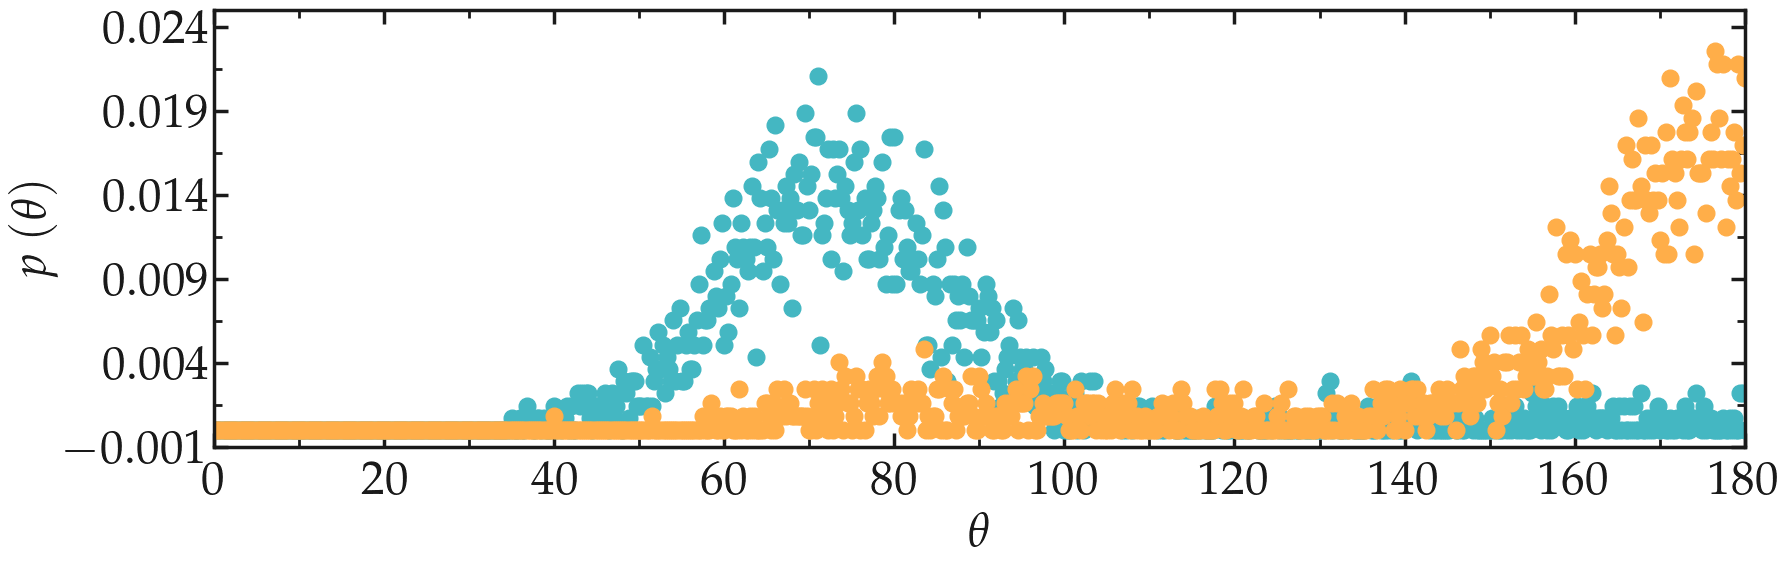

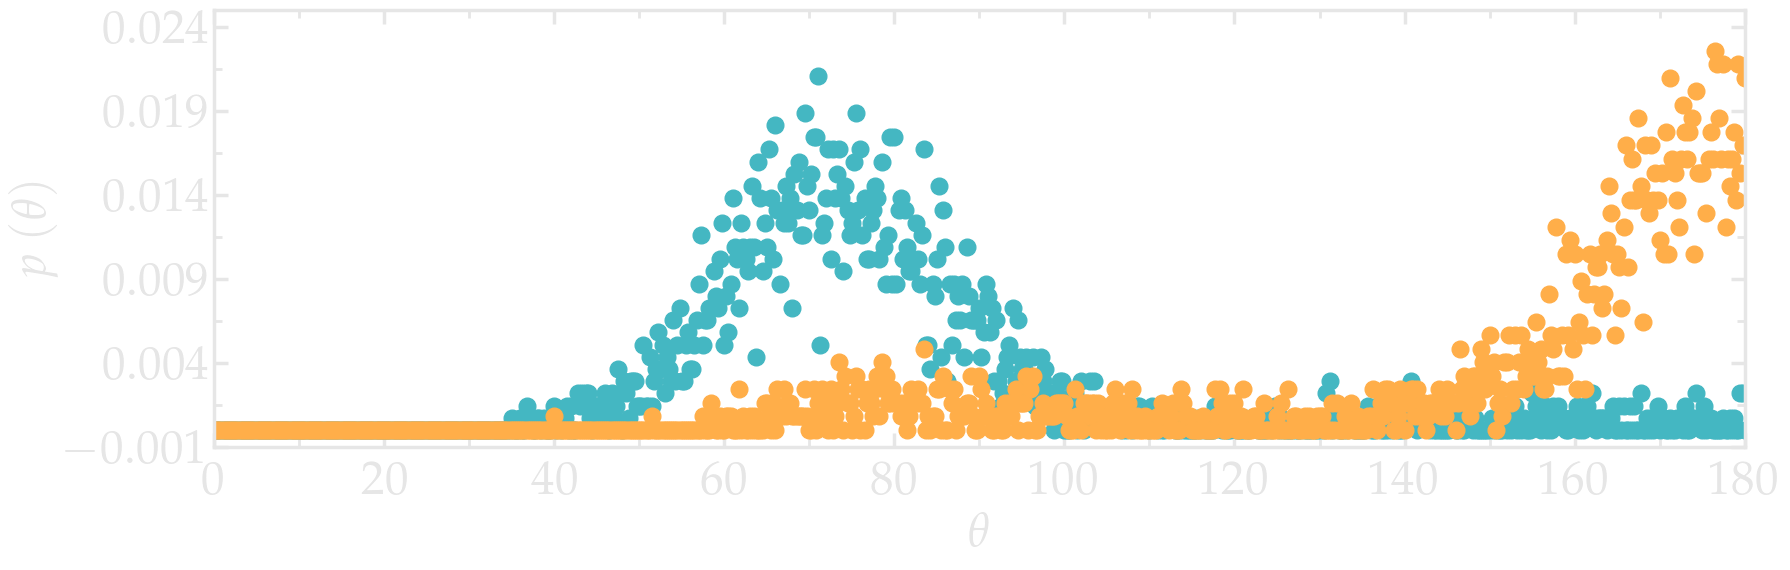

In [4]:
filename = "comparison-dihedral-distribution"
for mode, mygray in zip(['light', 'dark'], [colors["mylightgray"], colors["mydarkgray"]]):    
    fig = prepare_figure(mode, transparency = True, desired_figsize=(18,16))
    ax, n, l_tot, c_tot = [], 0, 3, 1
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    angle, probability = np.loadtxt("../cubic-box/dihedral-distribution.xvg", skiprows=28).T
    ax[-1].plot(angle, probability, "o", color=colors["mycyan"],
                markersize = 12, linewidth=4)
    angle, probability = np.loadtxt("dihedral-distribution.xvg", skiprows=28).T
    ax[-1].plot(angle, probability, "o", color=colors["myorange"],
                markersize = 12, linewidth=4)
    complete_panel(ax[-1], r'$\theta$', r'$p ~ (\theta)$',
                   xpad=10, legend=False, axis_color=mygray)
    set_boundaries(plt, x_boundaries=(0, 180), y_boundaries=(0, 0.025),
                   x_ticks=np.arange(0, 181, 20),
                   y_ticks=np.arange(-0.001, 0.026, 0.005))
    # add_subplotlabels(fig, ax, [r"$\textrm{a}$", r"$\textrm{b}$", r"$\textrm{c}$"], color=mygray)
    save_figure(plt, fig, mode, git_path, path_figures, filename)